<a href="https://githubtocolab.com/alsinmr/WindeschleubaNMRSchool/blob/main/JupyterExercises/Sol5/ex05_T2_1and2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Density Functions: T$_2$ Relaxation
### Solution to 2.1 and 2.2

### 1) Imports

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 16})
from numpy import pi

### 2) Define Constants

In [32]:
mu0 = 4*pi*1e-7                   #V s / A / m
hbar = 1.05457266e-34             #J s / rad
h = 2*pi*hbar                     #J s
gammaH = 26.7522128e7             #rad / s / T
gammaN = -2.7116e7                #rad / s / T
rNH = 1.1*1e-10                   #m 

### 3) Functions

In [6]:
#Spectral density function (for isotropic tumbling)
    #Call as: Jiso(omega, tau)
    #one of the two inputs can be an array
Jiso = lambda omega, tau: (2/5)*tau/(1+(omega*tau)**2)

### 4) Parameters

In [7]:
B0 = 14.1                           #T
sigma_zz1 = 0                       #ppm
sigma_zz2 = 50                      #ppm
sigma_zz3 = 150;                    #ppm
tauC = 10**np.arange(-12,-5,.01)    #s

omegaI = -B0*gammaH                 #rad/s, 1H Larmor frequency
omegaS = -B0*gammaN                 #rad/s, 15N Larmor frequency

deltaIS = -2*mu0*gammaH*gammaN*hbar/(4*pi)/rNH**3

### 5) Calculate T$_{2S}$

In [34]:
#s. Eq. (3) on the exercise sheet
    #note that sigma_zz is given in ppm above
R2S_1 = deltaIS**2/32 * (4*Jiso(0,tauC) + Jiso(omegaI-omegaS,tauC) \
                         + 3*Jiso(omegaS,tauC) + 6*Jiso(omegaI,tauC) \
                         + 6*Jiso(omegaI+omegaS,tauC))\
                         + 1/2 *(omegaS*sigma_zz1*1e-6)**2 *Jiso(0,tauC) \
                         + 3/8 *(omegaS*sigma_zz1*1e-6)**2 * Jiso(omegaS,tauC)
R2S_2 = deltaIS**2/32 * (4*Jiso(0,tauC) + Jiso(omegaI-omegaS,tauC) + 3*Jiso(omegaS,tauC) \
                         + 6*Jiso(omegaI,tauC) + 6*Jiso(omegaI+omegaS,tauC)) \
                         + 1/2 *(omegaS*sigma_zz2*1e-6)**2 *Jiso(0,tauC) \
                         + 3/8 *(omegaS*sigma_zz2*1e-6)**2 * Jiso(omegaS,tauC)
R2S_3 = deltaIS**2/32 * (4*Jiso(0,tauC) + Jiso(omegaI-omegaS,tauC) + 3*Jiso(omegaS,tauC) \
                         + 6*Jiso(omegaI,tauC) + 6*Jiso(omegaI+omegaS,tauC))\
                         + 1/2 *(omegaS*sigma_zz3*1e-6)**2 *Jiso(0,tauC) \
                         + 3/8 *(omegaS*sigma_zz3*1e-6)**2 * Jiso(omegaS,tauC)

   
T2S_1 = 1/R2S_1
T2S_2 = 1/R2S_2 
T2S_3 = 1/R2S_3

### 5) Double Logarithmic Plot of T$_{2S}$ vs. $\omega_S*\tau_c$

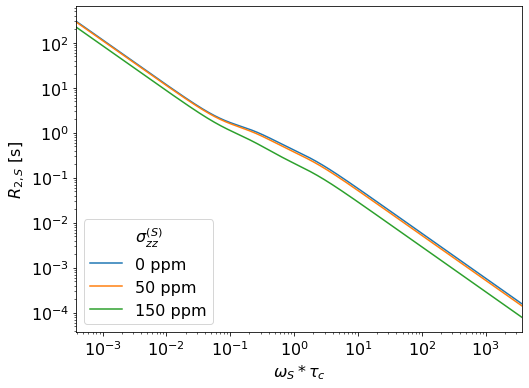

In [38]:
fig,ax=plt.subplots()
fig.set_size_inches([8,6])
ax.loglog(omegaS*tauC, T2S_1, linewidth=1.5)
ax.loglog(omegaS*tauC, T2S_2, linewidth=1.5)
ax.loglog(omegaS*tauC, T2S_3, linewidth=1.5)
ax.set_xlabel(r"$\omega_S*\tau_c$")
ax.set_ylabel(r"$R_{2,S}$ [s]")
ax.set_xlim([tauC[0]*omegaS,tauC[-1]*omegaS])
_=ax.legend(["0 ppm", "50 ppm", "150 ppm"],title=r'$\sigma_{zz}^{(S)}$',
         loc='lower left')